# Global Power Plant Database

In [1]:
#Importing Necessery Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

libraries Imported

In [160]:
#Fetching Data
df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data Imported

In [3]:
#Checking null values
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

We can see there are lot of null values available in the dataset. Some of the columns dosen't have any value so we delete those columns 

In [4]:
df.shape

(908, 25)

There are 908 rows and 25 columns in this dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

Here we can observe the data type and the null values

In [6]:
#Droping the columns because these all columns dosen't have any value 
df.drop(['estimated_generation_gwh','wepp_id','other_fuel3','other_fuel2','other_fuel1'],axis = 1,inplace  =True)
#Droping the columns because we don't need this columns
df.drop(['country','url'],axis = 1,inplace = True)
#Droping the below columns because the columns have same values 
df.drop(['country_long','generation_data_source','year_of_capacity_data'],axis = 1,inplace = True)
#Droping the columns because they dosen't corelated with the target variable 
df.drop(['name','owner','source'],axis = 1,inplace = True)

Drop unnecessary columns from the dataset

In [7]:
df.shape

(908, 12)

After reducing the columns we have only 12 columns left in the dataset

In [8]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,862.000000,862.000000,528.000000,384.000000,401.000000,425.000000,437.000000,443.000000
mean,321.046378,21.196189,77.447848,1996.876894,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.248627,4.907260,17.047817,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,16.771575,74.258975,1988.000000,244.458088,223.650436,174.174750,187.193669,177.643170
50%,60.000000,21.778300,76.719250,2000.000000,797.063475,805.760000,701.027250,716.728350,807.601700
75%,388.125000,25.516375,79.441475,2011.250000,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000
max,4760.000000,34.649000,95.408000,2018.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


From above observation we can see that the null values in the columns

In [9]:
#Checking data types
df.dtypes

gppd_idnr               object
capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
commissioning_year     float64
geolocation_source      object
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
dtype: object

Checking the datatypes of the dataset and as per the problem statement we have 2 target variables in this dataset.

1st is primary fuel which have classes in it so wee predict it through classification algo.

2nd is capacity_mw which have continuous data so we have to solve this bty regression algo




In [10]:
df.isnull().sum()

gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
geolocation_source      19
generation_gwh_2013    524
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
dtype: int64

In [11]:
cat_df=df.select_dtypes(include='object')
cat_df.columns

Index(['gppd_idnr', 'primary_fuel', 'geolocation_source'], dtype='object')

These are all categorical columns we have

In [13]:
#Fill Nan's
mode = df['geolocation_source'].mode()[0]
df['geolocation_source'].fillna(mode,inplace = True)

Filling the null value of the categorical column by the mode method

In [14]:
df.isnull().sum()

gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
geolocation_source       0
generation_gwh_2013    524
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
dtype: int64

In [20]:
df['gppd_idnr'] = df['gppd_idnr'].apply(lambda x: x[0:3])

By the help of this code we remove the numbers drom the column and only the first 3 character will be visible to us

In [153]:
#fill Nan's
var1 = ['latitude','longitude','commissioning_year','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015',
       'generation_gwh_2016','generation_gwh_2017']
for i in var1:
    median = df[i].median()
    df[i].fillna(median,inplace = True)

Fill the Nan's by the median method becuase all have continuous data

In [16]:
df.isnull().sum()

gppd_idnr              0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

After filling Nan's we can say that there are no Null value available in the dataset

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

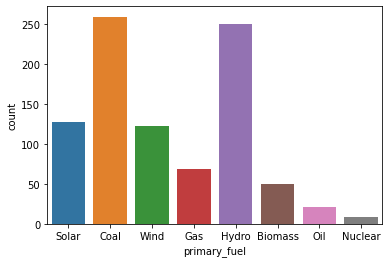

In [17]:
sns.countplot(df['primary_fuel'])
df['primary_fuel'].value_counts()

Coal and Hydro is more used in Primary fuel category and Nuclear is less used fuel 

WRI                                     785
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

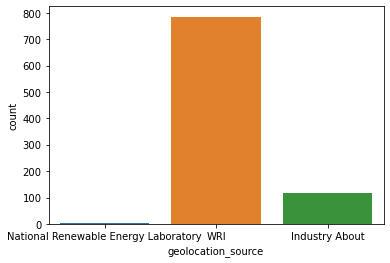

In [18]:
sns.countplot(df['geolocation_source'])
df['geolocation_source'].value_counts()

Most of geolocation source is World Resources Institute (WRI) and National Renewable Energy is less as Source 

IND    520
WRI    388
Name: gppd_idnr, dtype: int64

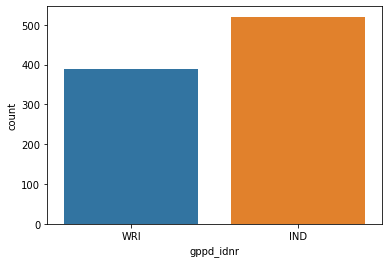

In [22]:
sns.countplot(df['gppd_idnr'])
df['gppd_idnr'].value_counts()

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

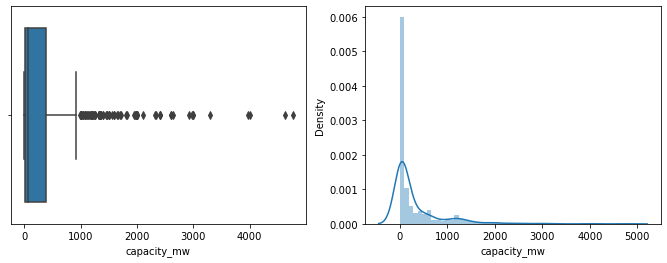

In [23]:
plt.figure(figsize = (18,4))
plt.subplot(1,3,1)
sns.boxplot(df['capacity_mw'])
plt.subplot(1,3,2)
sns.distplot(df['capacity_mw'])

From the above observation we can see the outliers available in this column and data also skewed

<AxesSubplot:xlabel='latitude', ylabel='Density'>

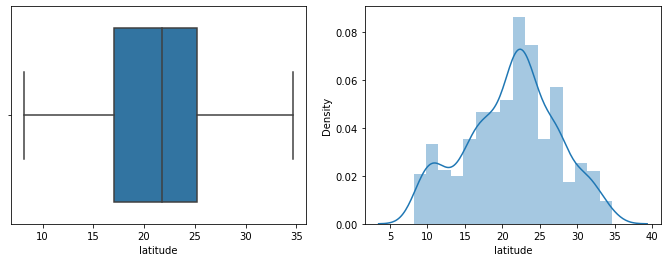

In [24]:
plt.figure(figsize = (18,4))
plt.subplot(1,3,1)
sns.boxplot(df['latitude'])
plt.subplot(1,3,2)
sns.distplot(df['latitude'])

There are no outlier present in lattitude column

<AxesSubplot:xlabel='longitude', ylabel='Density'>

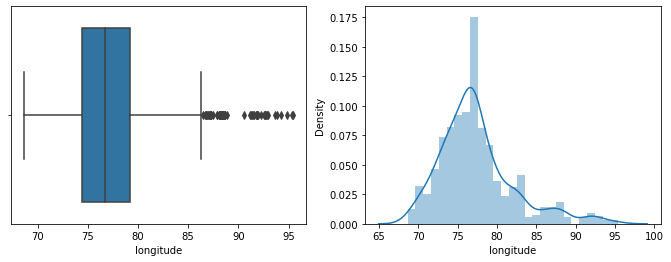

In [25]:
plt.figure(figsize = (18,4))
plt.subplot(1,3,1)
sns.boxplot(df['longitude'])
plt.subplot(1,3,2)
sns.distplot(df['longitude'])

There are outlier present in the longitude column and data is skewed

<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

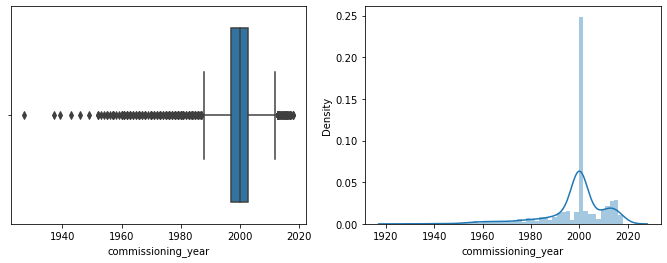

In [26]:
plt.figure(figsize = (18,4))
plt.subplot(1,3,1)
sns.boxplot(df['commissioning_year'])
plt.subplot(1,3,2)
sns.distplot(df['commissioning_year'])

The data is negatively skewed and there are outliers also present in this data


<AxesSubplot:xlabel='generation_gwh_2013', ylabel='Density'>

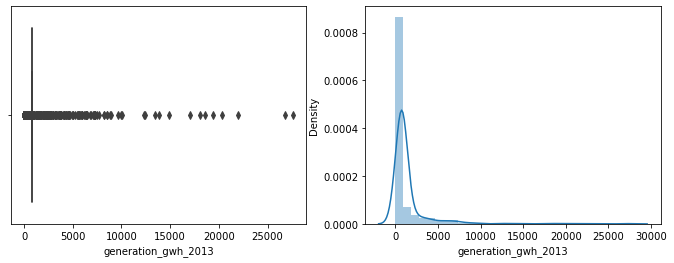

In [27]:
plt.figure(figsize = (18,4))
plt.subplot(1,3,1)
sns.boxplot(df['generation_gwh_2013'])
plt.subplot(1,3,2)
sns.distplot(df['generation_gwh_2013'])

There are so many outliers present in the dataset and the data also positively skewed

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

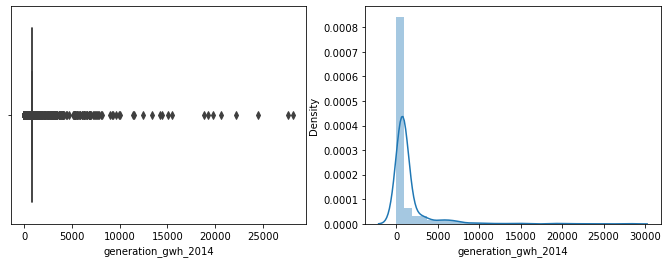

In [28]:
plt.figure(figsize = (18,4))
plt.subplot(1,3,1)
sns.boxplot(df['generation_gwh_2014'])
plt.subplot(1,3,2)
sns.distplot(df['generation_gwh_2014'])

There are so many outliers present in the dataset and the data also positively skewed

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

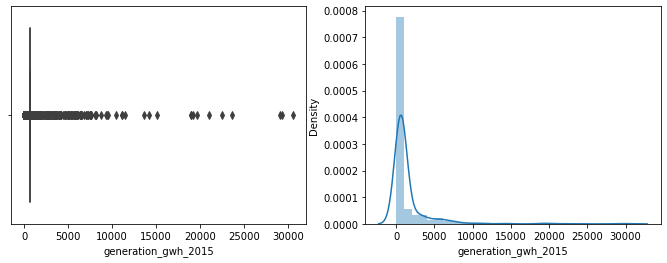

In [29]:
plt.figure(figsize = (18,4))
plt.subplot(1,3,1)
sns.boxplot(df['generation_gwh_2015'])
plt.subplot(1,3,2)
sns.distplot(df['generation_gwh_2015'])

There are so many outliers present in the dataset and the data also positively skewed

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

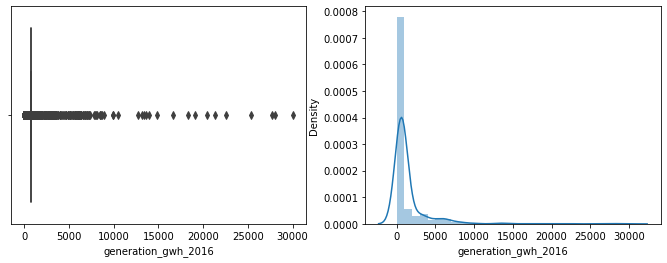

In [30]:
plt.figure(figsize = (18,4))
plt.subplot(1,3,1)
sns.boxplot(df['generation_gwh_2016'])
plt.subplot(1,3,2)
sns.distplot(df['generation_gwh_2016'])

There are so many outliers present in the dataset and the data also positively skewed

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

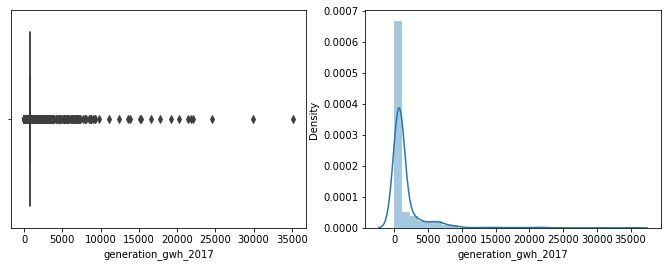

In [31]:
plt.figure(figsize = (18,4))
plt.subplot(1,3,1)
sns.boxplot(df['generation_gwh_2017'])
plt.subplot(1,3,2)
sns.distplot(df['generation_gwh_2017'])

There are so many outliers present in the dataset and the data also positively skewed

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

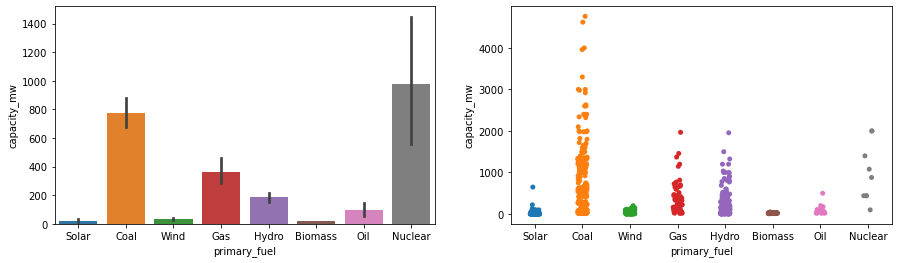

In [161]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.barplot(data = df, x= 'primary_fuel',y = 'capacity_mw')
plt.subplot(1,2,2)
sns.stripplot(data =df ,x ='primary_fuel',y ='capacity_mw')

From the above observation we can say that capacity is more for nuclear fuel type 

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2013'>

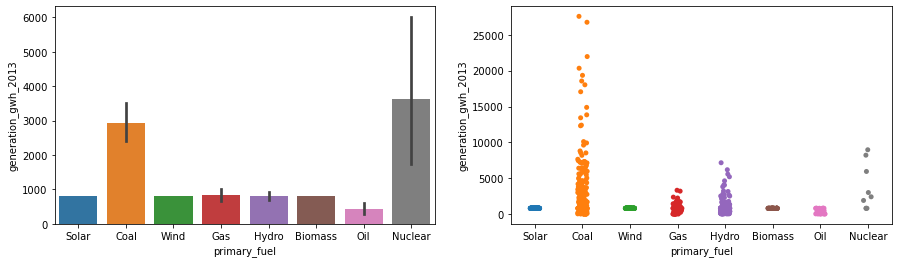

In [41]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.barplot(data = df, x= 'primary_fuel',y = 'generation_gwh_2013')
plt.subplot(1,2,2)
sns.stripplot(data =df ,x ='primary_fuel',y ='generation_gwh_2013')

From the above observation we can say that 2013 generation is more for nuclear and coal fuel type 

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

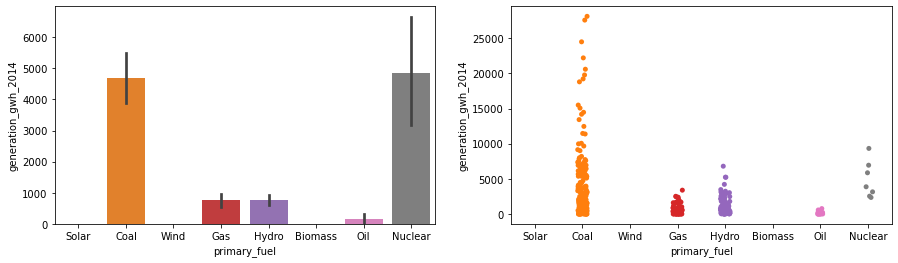

In [162]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.barplot(data = df, x= 'primary_fuel',y = 'generation_gwh_2014')
plt.subplot(1,2,2)
sns.stripplot(data =df ,x ='primary_fuel',y ='generation_gwh_2014')

From the above observation we can say that 2014 generation is more for nuclear and coal fuel type and for solar ,wind and biomass there are 0 generation 

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

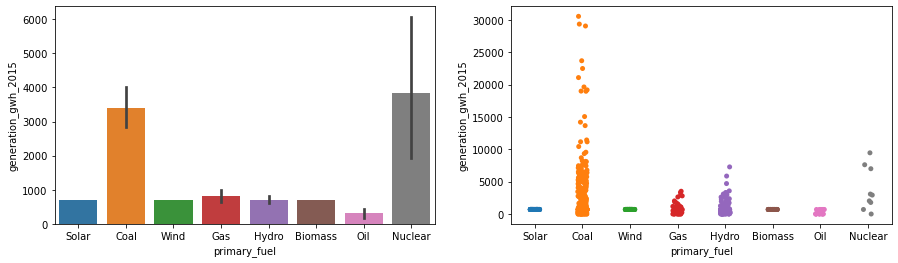

In [43]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.barplot(data = df, x= 'primary_fuel',y = 'generation_gwh_2015')
plt.subplot(1,2,2)
sns.stripplot(data =df ,x ='primary_fuel',y ='generation_gwh_2015')

From the above observation we can say that 2013 generation is more for nuclear and coal fuel type and less for oil

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

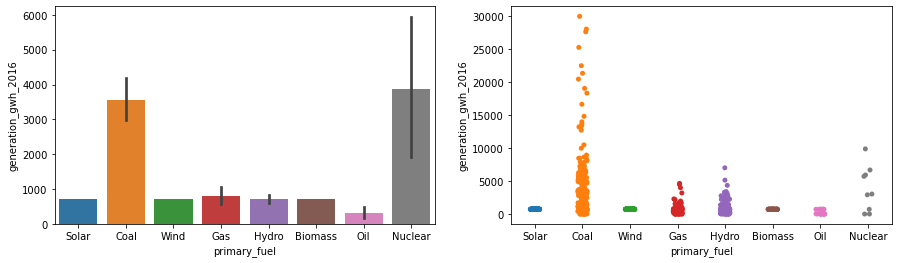

In [44]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.barplot(data = df, x= 'primary_fuel',y = 'generation_gwh_2016')
plt.subplot(1,2,2)
sns.stripplot(data =df ,x ='primary_fuel',y ='generation_gwh_2016')

From the above observation we can say that 2013 generation is more for nuclear and coal fuel type and less for oil

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

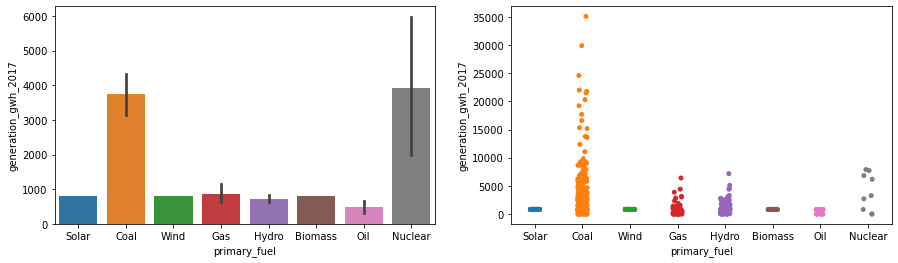

In [45]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.barplot(data = df, x= 'primary_fuel',y = 'generation_gwh_2017')
plt.subplot(1,2,2)
sns.stripplot(data =df ,x ='primary_fuel',y ='generation_gwh_2017')

From the above observation we can say that 2013 generation is more for nuclear and coal fuel type and less for oil

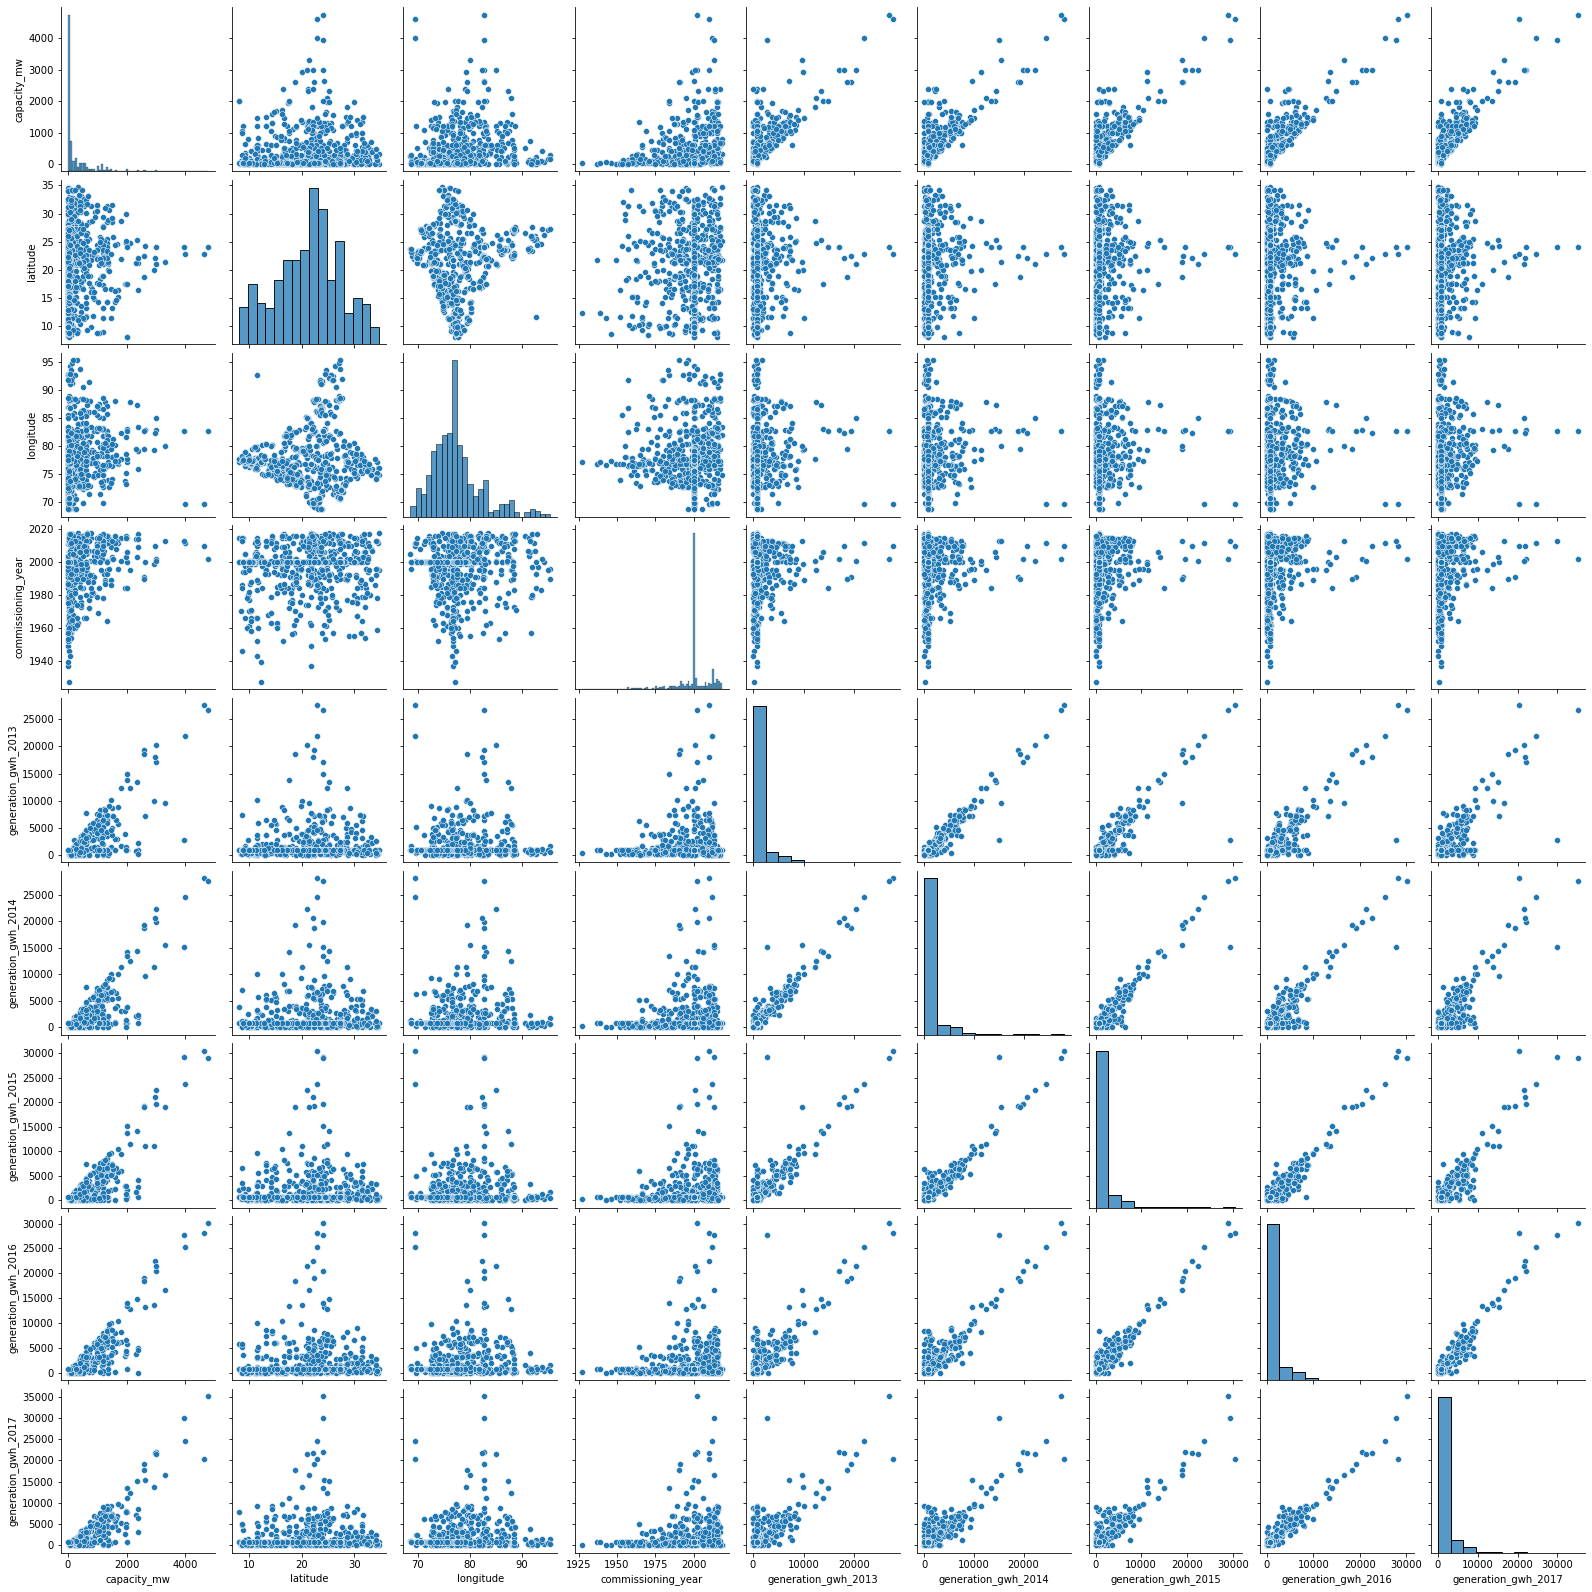

In [47]:
sns.pairplot(df)

In [50]:
#Importing libraries for classification algorithms
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV

In [51]:
#encoding the categorical ccolumns
encode = ['gppd_idnr', 'primary_fuel', 'geolocation_source']
le = LabelEncoder()
for i in encode:
    df[i] = le.fit_transform(df[i])
df

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,1,2.5,28.1839,73.2407,6,2011.0,1,797.063475,805.760000,701.027250,716.728350,807.601700
1,1,98.0,24.7663,74.6090,1,2000.0,2,797.063475,805.760000,701.027250,716.728350,807.601700
2,1,39.2,21.9038,69.3732,7,2000.0,2,797.063475,805.760000,701.027250,716.728350,807.601700
3,0,135.0,23.8712,91.3602,2,2004.0,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,0,1800.0,21.9603,82.4091,1,2015.0,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...
903,0,1600.0,16.2949,77.3568,1,2016.0,2,797.063475,805.760000,0.994875,233.596650,865.400000
904,1,3.0,12.8932,78.1654,6,2000.0,0,797.063475,805.760000,701.027250,716.728350,807.601700
905,1,25.5,15.2758,75.5811,7,2000.0,2,797.063475,805.760000,701.027250,716.728350,807.601700
906,1,80.0,24.3500,73.7477,1,2000.0,2,797.063475,805.760000,701.027250,716.728350,807.601700


After encoding we can say that categorical data converted into numerical data

In [54]:
df_corr = df.corr().abs()
df_corr

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
gppd_idnr,1.000000,0.416879,0.078930,0.426369,0.500012,0.138159,0.456112,0.213830,0.221411,0.232135,0.240317,0.238557
capacity_mw,0.416879,1.000000,0.047608,0.200473,0.377783,0.215667,0.204698,0.756523,0.804581,0.830400,0.863989,0.877058
latitude,0.078930,0.047608,1.000000,0.030775,0.010793,0.084220,0.182049,0.053106,0.057527,0.052797,0.046684,0.056430
longitude,0.426369,0.200473,0.030775,1.000000,0.352749,0.035731,0.249233,0.102637,0.107967,0.125723,0.148405,0.156255
primary_fuel,0.500012,0.377783,0.010793,0.352749,1.000000,0.065716,0.482803,0.228761,0.240407,0.249826,0.260900,0.263818
commissioning_year,0.138159,0.215667,0.084220,0.035731,0.065716,1.000000,0.061057,0.052258,0.086131,0.118738,0.151269,0.164514
geolocation_source,0.456112,0.204698,0.182049,0.249233,0.482803,0.061057,1.000000,0.097530,0.100988,0.105880,0.109612,0.108809
generation_gwh_2013,0.213830,0.756523,0.053106,0.102637,0.228761,0.052258,0.097530,1.000000,0.970385,0.907385,0.878836,0.839297
generation_gwh_2014,0.221411,0.804581,0.057527,0.107967,0.240407,0.086131,0.100988,0.970385,1.000000,0.963664,0.935000,0.903986
generation_gwh_2015,0.232135,0.830400,0.052797,0.125723,0.249826,0.118738,0.105880,0.907385,0.963664,1.000000,0.973256,0.940284


<AxesSubplot:>

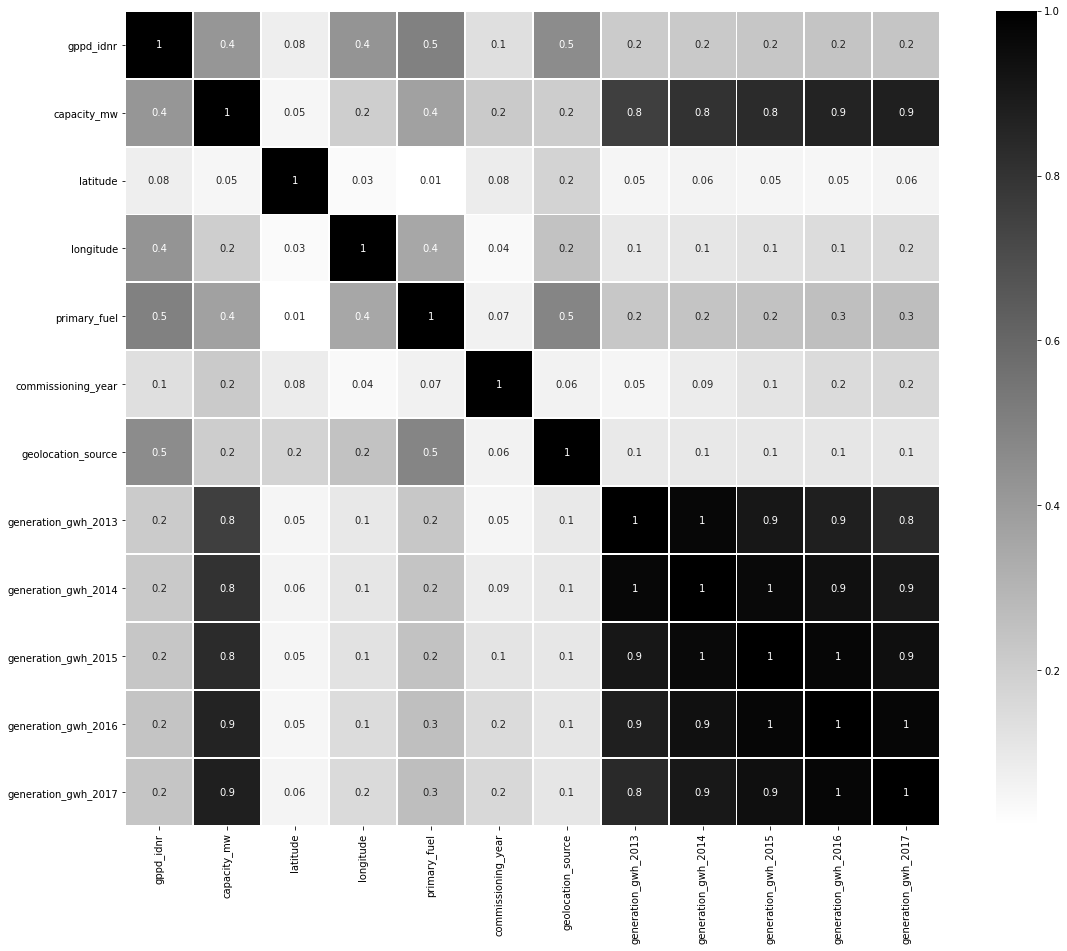

In [55]:
plt.figure(figsize = (20,15))
sns.heatmap(df_corr,annot = True,square = True,
           fmt='.1g', linewidth = 1,cmap = 'binary')

From the above observation we can see that the capacity and generation columns have good corelation and other column have less corelation because this columns are categorical columns

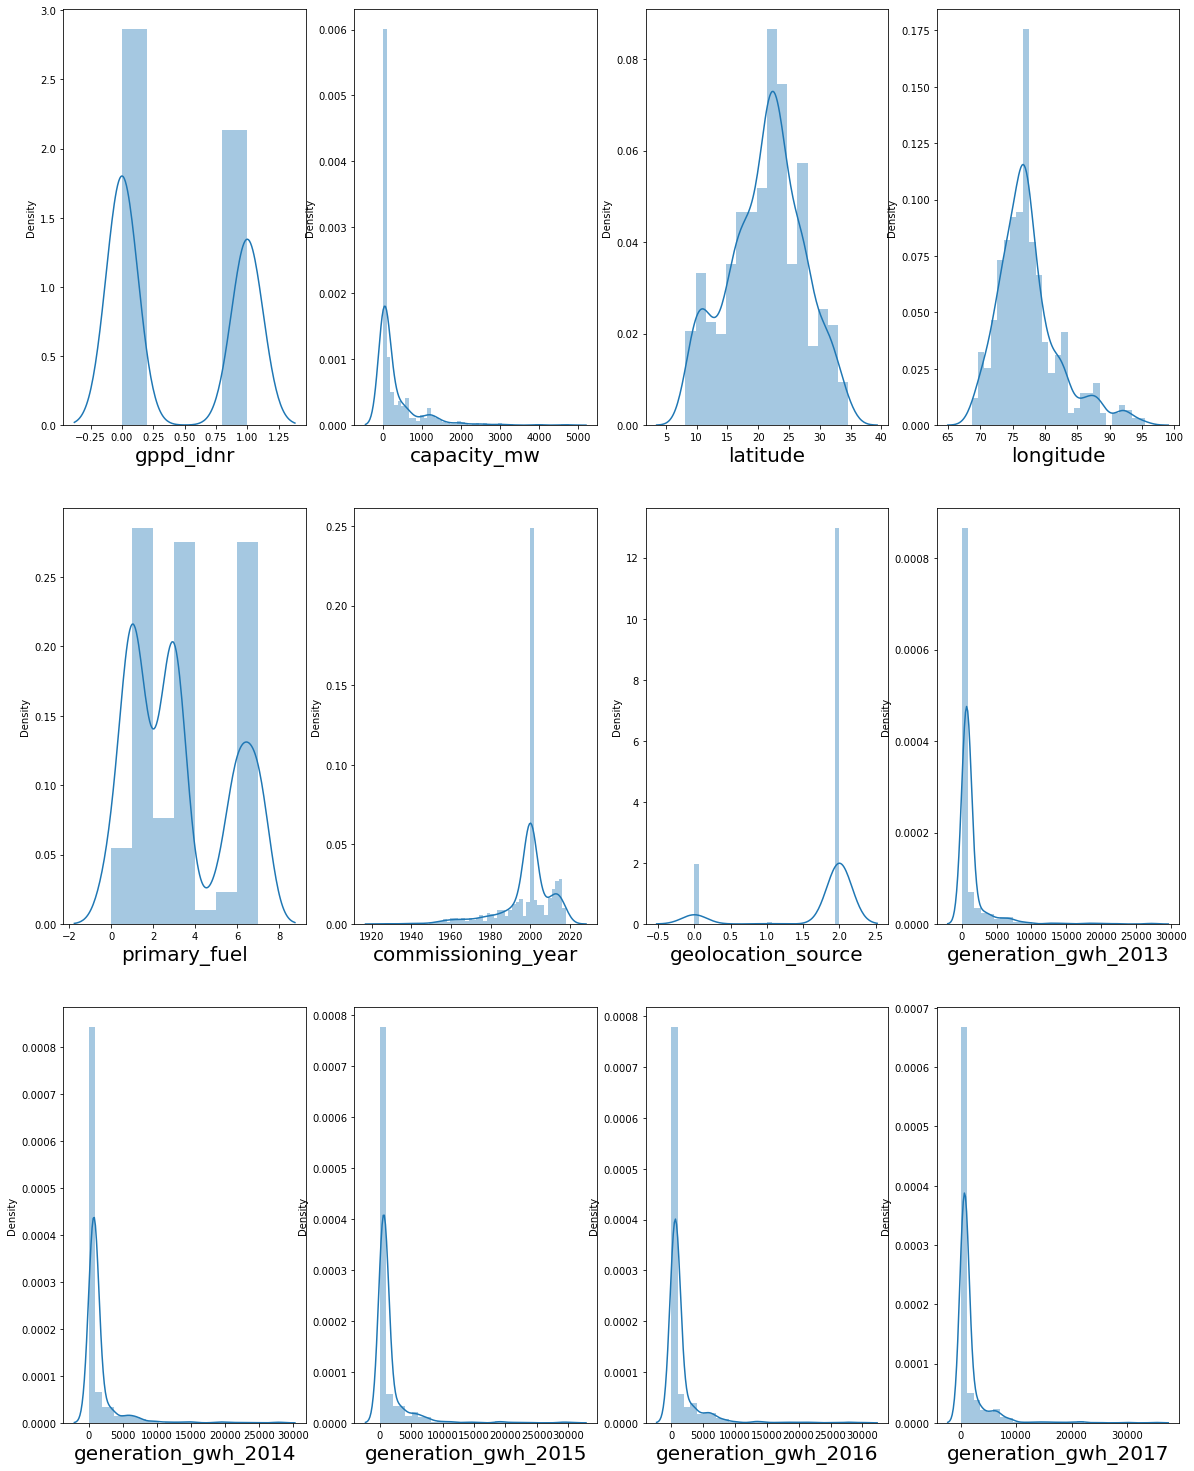

In [58]:
plt.figure(figsize = (20,26))
plotnumber = 1

for column in  df:
    if plotnumber <=15 :
        ax =plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.show()

In [59]:
df.skew()

gppd_idnr              0.294357
capacity_mw            3.193257
latitude              -0.161811
longitude              1.150963
primary_fuel           0.471141
commissioning_year    -1.650230
geolocation_source    -2.161710
generation_gwh_2013    5.535740
generation_gwh_2014    5.325540
generation_gwh_2015    5.565770
generation_gwh_2016    5.278233
generation_gwh_2017    5.312975
dtype: float64

Before removal of outliers we can see the skewness of the data,the data is highly skewed

In [126]:
df_col = df[['capacity_mw','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','longitude','commissioning_year']]

Columns with the outliers

In [127]:
#Removing outliers by zscore method
z = np.abs(zscore(df_col))
new_df = df[(z<3).all(axis = 1)]

Outliers removed

In [128]:
new_df.skew()

gppd_idnr              0.175507
capacity_mw            1.989023
latitude              -0.124902
longitude              0.895045
primary_fuel           0.406358
commissioning_year    -1.214445
geolocation_source    -2.060634
generation_gwh_2013    3.093592
generation_gwh_2014    2.945404
generation_gwh_2015    2.732912
generation_gwh_2016    2.678038
generation_gwh_2017    2.572964
dtype: float64

After removing outliers we can see that the skewness also reduced

In [129]:
print('Shape Before and After')
print('Shape Before:',df.shape)
print('Shape After:',new_df.shape)
print('Percentage Loss:',((df.shape[0]-new_df.shape[0])/df.shape[0])*100)

Shape Before and After
Shape Before: (908, 12)
Shape After: (848, 12)
Percentage Loss: 6.607929515418502


Outliers removed and in result we get 6.60% data loss

In [81]:
#Seprating target variable
x = new_df.drop('primary_fuel',axis = 1)
y = new_df['primary_fuel']

In [82]:
x.skew()

gppd_idnr              0.175507
capacity_mw            1.989023
latitude              -0.124902
longitude              0.895045
commissioning_year    -1.214445
geolocation_source    -2.060634
generation_gwh_2013    3.093592
generation_gwh_2014    2.945404
generation_gwh_2015    2.732912
generation_gwh_2016    2.678038
generation_gwh_2017    2.572964
dtype: float64

In [83]:
#Removing skewness of the data
x['capacity_mw'] = np.log1p(x['capacity_mw'])
x['longitude'] = np.log1p(x['longitude'])
x['generation_gwh_2013'] = np.sqrt(x['generation_gwh_2013'])
x['generation_gwh_2014'] = np.sqrt(x['generation_gwh_2014'])
x['generation_gwh_2015'] = np.sqrt(x['generation_gwh_2015'])
x['generation_gwh_2016'] = np.sqrt(x['generation_gwh_2016'])
x['generation_gwh_2017'] = np.sqrt(x['generation_gwh_2017'])

Skewness removed

In [86]:
x.skew()

gppd_idnr              0.175507
capacity_mw            0.072894
latitude              -0.124902
longitude              0.719999
commissioning_year    -1.214445
geolocation_source    -2.060634
generation_gwh_2013   -0.570612
generation_gwh_2014   -0.662300
generation_gwh_2015   -0.395016
generation_gwh_2016   -0.391851
generation_gwh_2017   -0.531495
dtype: float64

As we can see the skewness is reduced

In [87]:
y.value_counts()

1    236
3    218
6    126
7    123
2     65
0     50
5     21
4      9
Name: primary_fuel, dtype: int64

And as we see above in this dataset , there is class imbalancing problem so we have to cure it

In [88]:
#Resampling the data 
SM = SMOTE()
x,y = SM.fit_resample(x,y)

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

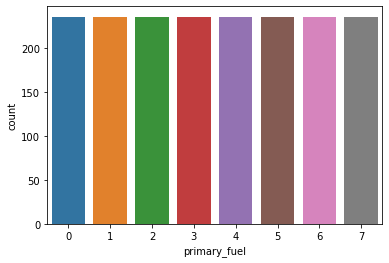

In [89]:
sns.countplot(y)

As we can see all classes are equal

In [90]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

Scaling the data by Standard Scaler method

In [91]:
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = i)
    dt = DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    pred = dt.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print('Best Accuracy is',maxAccu, 'on Random State',maxRS)

Best Accuracy is 0.885593220338983 on Random State 165


From the above code we get the best random state as 165

In [92]:
x_train ,x_test, y_train, y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = maxRS)

In [97]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
DTC = accuracy_score(y_test,preddt)
print('Accuracy_Score :',DTC)
print('Confusion_Matrix:\n',confusion_matrix(y_test,preddt))
print('Classification_Report:\n',classification_report(y_test,preddt))

Accuracy_Score : 0.8834745762711864
Confusion_Matrix:
 [[55  3  0  0  0  0  0  1]
 [ 2 39  6  3  4  2  0  1]
 [ 0  3 43  0  0  3  0  1]
 [ 0  4  6 40  4  1  0  0]
 [ 0  1  0  0 62  1  0  0]
 [ 0  0  1  0  0 56  0  0]
 [ 0  0  0  0  0  0 65  0]
 [ 3  3  1  0  0  1  0 57]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92        59
           1       0.74      0.68      0.71        57
           2       0.75      0.86      0.80        50
           3       0.93      0.73      0.82        55
           4       0.89      0.97      0.93        64
           5       0.88      0.98      0.93        57
           6       1.00      1.00      1.00        65
           7       0.95      0.88      0.91        65

    accuracy                           0.88       472
   macro avg       0.88      0.88      0.88       472
weighted avg       0.89      0.88      0.88       472



By using DecisionTreeClassifier we get 0.88 accuracy score 

In [98]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predrf = rf.predict(x_test)
RFC = accuracy_score(y_test,predrf)
print('Accuracy_Score :',RFC)
print('Confusion_Matrix:\n',confusion_matrix(y_test,predrf))
print('Classification_Report:\n',classification_report(y_test,predrf))

Accuracy_Score : 0.9088983050847458
Confusion_Matrix:
 [[55  3  0  0  0  0  0  1]
 [ 2 41  4  3  4  2  0  1]
 [ 0  2 45  0  0  3  0  0]
 [ 0  1  4 45  5  0  0  0]
 [ 0  0  1  1 62  0  0  0]
 [ 0  0  0  1  0 56  0  0]
 [ 0  0  0  0  0  0 65  0]
 [ 4  0  0  0  0  1  0 60]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92        59
           1       0.87      0.72      0.79        57
           2       0.83      0.90      0.87        50
           3       0.90      0.82      0.86        55
           4       0.87      0.97      0.92        64
           5       0.90      0.98      0.94        57
           6       1.00      1.00      1.00        65
           7       0.97      0.92      0.94        65

    accuracy                           0.91       472
   macro avg       0.91      0.91      0.90       472
weighted avg       0.91      0.91      0.91       472



By using RandomForestClassifier we get 0.90 accuracy score 

In [100]:
from sklearn import svm
svc = svm.SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
SVC = accuracy_score(y_test,predsvc)
print('Accuracy_Score :',SVC)
print('Confusion_Matrix:\n',confusion_matrix(y_test,predsvc))
print('Classification_Report:\n',classification_report(y_test,predsvc))

Accuracy_Score : 0.7309322033898306
Confusion_Matrix:
 [[56  0  0  0  0  0  0  3]
 [ 6 28  6  2  9  1  0  5]
 [ 4  5 31  3  0  3  0  4]
 [ 0  3  6 44  2  0  0  0]
 [ 0  0  1  1 62  0  0  0]
 [24  0  1  4  0 26  0  2]
 [ 0  0  0  0  0  0 65  0]
 [27  4  0  0  0  1  0 33]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.48      0.95      0.64        59
           1       0.70      0.49      0.58        57
           2       0.69      0.62      0.65        50
           3       0.81      0.80      0.81        55
           4       0.85      0.97      0.91        64
           5       0.84      0.46      0.59        57
           6       1.00      1.00      1.00        65
           7       0.70      0.51      0.59        65

    accuracy                           0.73       472
   macro avg       0.76      0.72      0.72       472
weighted avg       0.76      0.73      0.73       472



By using SVC we get 0.73 accuracy score 

In [112]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
predknn = knn.predict(x_test)
KNNC = accuracy_score(y_test,predknn)
print('Accuracy_Score :',KNNC)
print('Confusion_Matrix:\n',confusion_matrix(y_test,predknn))
print('Classification_Report:\n',classification_report(y_test,predknn))

Accuracy_Score : 0.8283898305084746
Confusion_Matrix:
 [[53  3  0  0  0  0  0  3]
 [ 3 30 10  3  8  2  0  1]
 [ 0  4 37  1  0  8  0  0]
 [ 0  3  6 42  2  2  0  0]
 [ 0  0  5  1 58  0  0  0]
 [ 0  0  6  2  0 49  0  0]
 [ 0  0  0  0  0  0 65  0]
 [ 5  1  0  0  0  2  0 57]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88        59
           1       0.73      0.53      0.61        57
           2       0.58      0.74      0.65        50
           3       0.86      0.76      0.81        55
           4       0.85      0.91      0.88        64
           5       0.78      0.86      0.82        57
           6       1.00      1.00      1.00        65
           7       0.93      0.88      0.90        65

    accuracy                           0.83       472
   macro avg       0.83      0.82      0.82       472
weighted avg       0.83      0.83      0.83       472



By using KNeighborsClassifier we get 0.82 accuracy score 

In [103]:
#Calculating Cross_Val_score
DTCV = cross_val_score(dt, x, y, cv = 5)
print('Cross Validation score of DecisionTree model:',DTCV.mean())

Cross Validation score of DecisionTree model: 0.8538138745035297


In [104]:
RFCV = cross_val_score(rf,x,y,cv = 5)
print('Cross Validation score of RandomForest model:',RFCV.mean())

Cross Validation score of RandomForest model: 0.9014862532103912


In [105]:
SVCV = cross_val_score(svc,x,y,cv = 5)
print('Cross Validation score of SVC model:',SVCV.mean())

Cross Validation score of SVC model: 0.33900748038679074


In [113]:
KNNCV = cross_val_score(knn,x,y,cv = 5)
print('Cross Validation score of RandomForest model:',KNNCV.mean())

Cross Validation score of RandomForest model: 0.8172694483039311


In [114]:
#Creating DataFrame of Difference between acc_Score and CV score
pd.DataFrame({'Model':['DecisionTreeClassifier','RandomForestClassifier','SVC','KNeighborsClassifier'],
             'acc_score':[DTC,RFC,SVC,KNNC],
             'cross_val_score':[DTCV.mean(),RFCV.mean(),SVCV.mean(),KNNCV.mean()],
             'Difference':[(DTC-DTCV.mean()),(RFC-RFCV.mean()),(SVC-SVCV.mean()),(KNNC-KNNCV.mean())]})

,Model,acc_score,cross_val_score,Difference
0,DecisionTreeClassifier,0.883475,0.853814,0.029661
1,RandomForestClassifier,0.908898,0.901486,0.007412
2,SVC,0.730932,0.339007,0.391925
3,KNeighborsClassifier,0.828390,0.817269,0.011120


From the above observation we can say that RandomForestClassifier have less difference than others So we used RandomForest for GridSearchCV

In [115]:
#GridSearchCV Parameteers for RandomForestClassifier
#Adding parameters 
parameters = {'n_estimators':[20,30,40,50,60],
              'criterion':['gini','entropy'],
              'max_depth':[2,3,4,5,6,7],
              'max_features':['auto','sqrt','log2'],
              'min_samples_leaf':[1,2,3,4,5]}

In [116]:
#Using GridSearchCV for finding best params
GCV = GridSearchCV(rf,parameters,cv = 5)
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 30}

Best parameters for RandomForestClassifier

In [117]:
finalmod = RandomForestClassifier(criterion = 'entropy',max_depth =7, max_features = 'sqrt',n_estimators = 30, min_samples_leaf = 1,)

finalmod.fit(x_train,y_train)
pred = finalmod.predict(x_test)
print('Accuracy Score of the RF Model:',accuracy_score(y_test,pred)*100)
finalmodCV = cross_val_score(finalmod,x,y,cv = 5)
print('Cross Validation Score of RF Model is',finalmodCV.mean()*100)
print('Confusion Matrix:\n',confusion_matrix(y_test,pred))
print('Classification Report:\n',classification_report(y_test,pred))

Accuracy Score of the RF Model: 84.95762711864407
Cross Validation Score of RF Model is 85.06378678792473
Confusion Matrix:
 [[56  0  0  0  0  0  0  3]
 [ 3 31  4  3  8  2  0  6]
 [ 0  1 37  0  1 11  0  0]
 [ 0  4  6 40  5  0  0  0]
 [ 0  0  0  1 62  1  0  0]
 [ 0  0  0  2  0 55  0  0]
 [ 0  0  0  0  0  0 65  0]
 [10  0  0  0  0  0  0 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.87        59
           1       0.86      0.54      0.67        57
           2       0.79      0.74      0.76        50
           3       0.87      0.73      0.79        55
           4       0.82      0.97      0.89        64
           5       0.80      0.96      0.87        57
           6       1.00      1.00      1.00        65
           7       0.86      0.85      0.85        65

    accuracy                           0.85       472
   macro avg       0.85      0.84      0.84       472
weighted avg       0.85      0.85     

By applying best parameters to the RandomForestClassifier we get 84.95 acc score

### Predicting Capacity_mw

In [118]:
#Checking skewness
df.skew()

gppd_idnr              0.294357
capacity_mw            3.193257
latitude              -0.161811
longitude              1.150963
primary_fuel           0.471141
commissioning_year    -1.650230
geolocation_source    -2.161710
generation_gwh_2013    5.535740
generation_gwh_2014    5.325540
generation_gwh_2015    5.565770
generation_gwh_2016    5.278233
generation_gwh_2017    5.312975
dtype: float64

Skewness before removing outliers

In [122]:
df_var = df[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','longitude','commissioning_year']]
z = np.abs(zscore(df_var))
df_new = df[(z<3).all(axis = 1)]

Outliers removed by zscore method

In [123]:
df_new.skew()

gppd_idnr              0.184195
capacity_mw            2.134177
latitude              -0.123512
longitude              0.888694
primary_fuel           0.413982
commissioning_year    -1.209638
geolocation_source    -2.068499
generation_gwh_2013    3.096648
generation_gwh_2014    2.940976
generation_gwh_2015    2.714988
generation_gwh_2016    2.635667
generation_gwh_2017    2.532066
dtype: float64

After removing outliers we can see that skrwness also reduced

In [124]:
print('Shape Before and After')
print('Shape Before:',df.shape)
print('Shape After:',df_new.shape)
print('Percentage Loss:',((df.shape[0]-df_new.shape[0])/df.shape[0])*100)

Shape Before and After
Shape Before: (908, 12)
Shape After: (852, 12)
Percentage Loss: 6.167400881057269


By removing outliers in result we get 6.16% data loss

In [134]:
df_new.skew()

gppd_idnr              0.184195
capacity_mw            2.134177
latitude              -0.123512
longitude              0.888694
primary_fuel           0.413982
commissioning_year    -1.209638
geolocation_source    -2.068499
generation_gwh_2013    3.096648
generation_gwh_2014    2.940976
generation_gwh_2015    2.714988
generation_gwh_2016    2.635667
generation_gwh_2017    2.532066
dtype: float64

In [135]:
#Seprating Target variable
x = df_new.drop('capacity_mw' ,axis = 1)
y = df_new['capacity_mw']

In [136]:
x['longitude'] = np.log1p(x['longitude'])
x['generation_gwh_2013'] = np.sqrt(x['generation_gwh_2013'])
x['generation_gwh_2014'] = np.sqrt(x['generation_gwh_2014'])
x['generation_gwh_2015'] = np.sqrt(x['generation_gwh_2015'])
x['generation_gwh_2016'] = np.sqrt(x['generation_gwh_2016'])
x['generation_gwh_2017'] = np.sqrt(x['generation_gwh_2017'])

Removing skewness of the skewed data

In [139]:
x.skew()

gppd_idnr              0.184195
latitude              -0.123512
longitude              0.713890
primary_fuel           0.413982
commissioning_year    -1.209638
geolocation_source    -2.068499
generation_gwh_2013   -0.569176
generation_gwh_2014   -0.667828
generation_gwh_2015   -0.397232
generation_gwh_2016   -0.385221
generation_gwh_2017   -0.503919
dtype: float64

In [140]:
scaler  =StandardScaler()
x_scaled = scaler.fit_transform(x)

Scaling the data bu Standard Scaler method

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR 
from sklearn import svm
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn import metrics

Importing libraries for regression 

In [143]:
maxR2 = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    R2_score = r2_score(y_test,pred)
    if R2_score > maxR2:
        maxR2 = R2_score
        maxRS = i
print('R2_Score is',maxR2,'on random_state',maxRS)    

R2_Score is 0.688948471847079 on random_state 93


In [144]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = maxRS)

R2_Score of Linear regression: 0.688948471847079
MAE: 134.4080660700213
MSE: 41139.184402783074
RMSE: 202.82796750641435


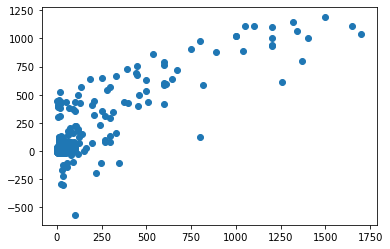

In [145]:
#Applying linear regression
lr = LinearRegression()
lr.fit(x_train, y_train)
predlr = lr.predict(x_test)
print('R2_Score of Linear regression:',r2_score(y_test,predlr))
print('MAE:', metrics.mean_absolute_error(y_test, predlr))
print('MSE:', metrics.mean_squared_error(y_test, predlr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predlr)))
plt.scatter(x=y_test,y=predlr)

By applying Linear Regression to the model we get 0.68 as r2_score

R2_score of Random Forest: 0.8131257624174186
MAE: 82.46747912324751
MSE: 24715.691852379387
RMSE: 157.21225096149277


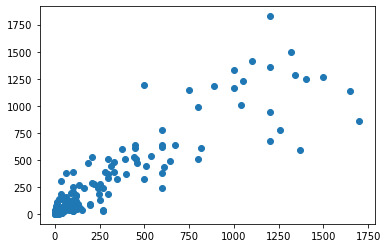

In [146]:
#Applying RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
RFR = r2_score(y_test,predrf)
print('R2_score of Random Forest:',RFR)
print('MAE:', metrics.mean_absolute_error(y_test, predrf))
print('MSE:', metrics.mean_squared_error(y_test, predrf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predrf)))
plt.scatter(x=y_test,y=predrf)

By applying RandomForestRegressor to the model we get 0.81 as r2_score

R2_score of KNN : 0.8166554033998639
MAE: 86.40687230046949
MSE: 24248.86710435549
RMSE: 155.72047747279575


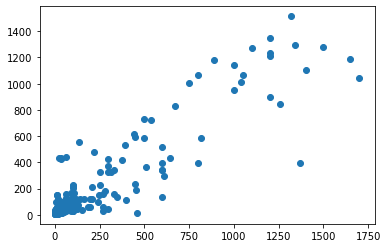

In [147]:
#Applying KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors = 5)
KNN.fit(x_train,y_train)
predknn = KNN.predict(x_test)
KNNR = r2_score(y_test,predknn)
print('R2_score of KNN :',KNNR)
print('MAE:', metrics.mean_absolute_error(y_test, predknn))
print('MSE:', metrics.mean_squared_error(y_test, predknn))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predknn)))
plt.scatter(x=y_test,y=predknn)

By applying KNeighborsRegressor to the model we get 0.81 as r2_score

R2_score of SVR : -0.042322142365306625
MAE: 185.1613873617845
MSE: 137855.8821957923
RMSE: 371.28948570595463


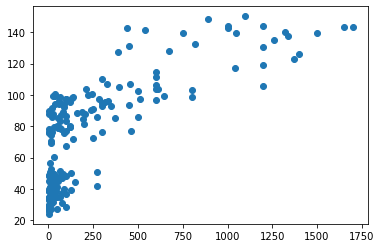

In [149]:
#Applying SVR
SVR = svm.SVR()
SVR.fit(x_train,y_train)
predsvr = SVR.predict(x_test)
SVRR = r2_score(y_test,predsvr)
print('R2_score of SVR :',SVRR)
print('MAE:', metrics.mean_absolute_error(y_test, predsvr))
print('MSE:', metrics.mean_squared_error(y_test, predsvr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predsvr)))
plt.scatter(x=y_test,y=predsvr)

We checked the r2 score and RMSE of the models and from thattwe get less RMSE from the RandomForestRegressor So we use RandomForestRegressor for the GridSearchCV 

In [154]:
#GridSearchCV Parameters for RandomForestRegressor
parameters ={'n_estimators':[30,40,50,70,90],
             'criterion':['mse','mae'],
             'max_features':['auto','sqrt','log2'],
             'min_samples_split':[2,4,6,5,8],}

GCVRF = GridSearchCV(rf,parameters,cv = 5)

GCVRF.fit(x_train,y_train)
GCVRF.best_params_

{'criterion': 'mse',
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 50}

r2_score of the model is 84.66740814551534
MAE: 78.71948448655432
MSE: 20278.6441018271
RMSE: 142.40310425628755


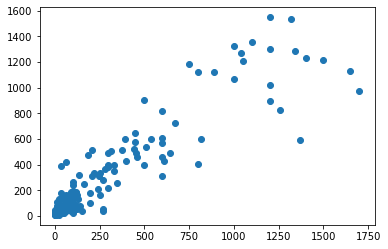

In [156]:
RFmod = RandomForestRegressor(criterion = 'mse',max_features = 'sqrt',min_samples_leaf = 2,n_estimators = 50)
RFmod.fit(x_train,y_train)
pred = RFmod.predict(x_test)
print('r2_score of the model is',r2_score(y_test,pred)*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
plt.scatter(x=y_test,y=pred)

By applying best params to he randomforestregressor we get 84.66 as r2_score

In [157]:
#Saving the primary fuel model
import joblib
joblib.dump(finalmod,'GlobalPowerPlantPrimaryFuel.pkl')

['GlobalPowerPlantPrimaryFuel.pkl']

Saving the PrimaryFuel prediction Model

In [158]:
joblib.dump(RFmod,'GlobalPowerPlantCapacity_mw.pkl')

['GlobalPowerPlantCapacity_mw.pkl']

Saving the Capacity_mw prediction Model